In [84]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
from sklearn.cluster import KMeans
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm

In [86]:
df=pd.read_csv(r"C:\Users\Cyborg\Music\mueller_report.csv")

In [87]:
df.describe()

,page,line
count,19195.000000,19195.000000
mean,224.540141,23.744725
std,121.650416,14.235052
min,1.000000,1.000000
25%,120.000000,11.000000
50%,232.000000,23.000000
75%,326.000000,35.000000
max,448.000000,59.000000


In [88]:
print("Number of data points:",df.shape[0])

Number of data points: 19195


In [89]:
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

       page  line text
11        1    12  NaN
14        2     3  NaN
49        3    35  NaN
87        4    38  NaN
126       5    39  NaN
164       6    38  NaN
201       7    37  NaN
204       8     3  NaN
247       9    43  NaN
287      10    40  NaN
297      11    10  NaN
335      12    38  NaN
377      13    42  NaN
423      14    46  NaN
468      15    45  NaN
510      16    42  NaN
549      17    39  NaN
590      18    41  NaN
634      19    44  NaN
680      20    46  NaN
726      21    46  NaN
770      22    44  NaN
810      23    40  NaN
837      24    27  NaN
858      25    21  NaN
874      26    16  NaN
903      27    29  NaN
915      28    12  NaN
936      29    21  NaN
966      30    30  NaN
...     ...   ...  ...
18278   419    43  NaN
18320   420    42  NaN
18363   421    43  NaN
18403   422    40  NaN
18442   423    39  NaN
18482   424    40  NaN
18523   425    41  NaN
18551   426    28  NaN
18587   427    36  NaN
18623   428    36  NaN
18664   429    41  NaN
18704   430

In [90]:
df = df[pd.notnull(df['text'])]
print("Number of new data points:",df.shape[0])
print("percentage of data to be used: ", 18747/19195, " (%)percentage")

Number of new data points: 18747
percentage of data to be used:  0.9766605886949726  (%)percentage


In [91]:
# STOP_WORDS = stopwords.words("english")


In [92]:
from bs4 import BeautifulSoup


In [93]:
def decontracted(phrase):
# specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [94]:
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(df['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in STOP_WORDS)
    preprocessed_reviews.append(sentance.strip())


100%|██████████████████████████████████████████████████████████████████████████| 18747/18747 [00:06<00:00, 3041.58it/s]


In [120]:
X=preprocessed_reviews[:]
# y=final['Score'][:]
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)
X_train=preprocessed_reviews[:13000]
X_test=preprocessed_reviews[13000 :]
# bow = TfidfVectorizer()
# X_train_bow=bow.fit_transform(X_train)
# X_test_bow=bow.transform(X_test)

tfidf = TfidfVectorizer()

X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)
tfidf_features=tfidf.get_feature_names()

In [121]:
# X=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names())

In [122]:
# X.head()

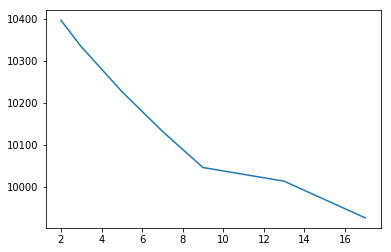

In [123]:
errors=[]
k_value=[2,3,5,7,9, 13,  17]
for i in k_value:
    kmeans = KMeans(n_clusters=i, random_state=0, n_jobs=-1)
    kmeans.fit(X_train_tfidf)
    pred=kmeans.predict(X_test_tfidf)
    errors.append(kmeans.inertia_)
plt.plot(k_value, errors)
plt.show()

In [124]:
model=KMeans(n_clusters=9, n_jobs=-1)
# z=tfidf.fit_transform(pr)
model.fit(X_train_tfidf)
w=model.labels_

In [126]:
centroids = pd.DataFrame(model.cluster_centers_)

centroids.columns = tfidf.get_feature_names()

centroids

,aa,aaron,abc,abdel,ability,able,aboard,abou,abov,abrams,...,zerkpredttet,zero,zes,zhang,ziff,zone,zov,zstan,zubrin,zwaan
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.00000,0.000000,0.000283,0.001261,0.000482,0.000000,0.00035,0.000000,0.000000,...,0.000000,0.000000,0.000255,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.00039,0.000438,0.000000,0.000791,0.001028,0.000000,0.00000,0.000000,0.000379,...,0.000000,0.000600,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00048,0.000000
4,0.000039,0.00000,0.000124,0.000000,0.000635,0.000652,0.000042,0.00000,0.000043,0.000131,...,0.000041,0.000041,0.000000,0.000041,0.00011,0.000039,0.000044,0.000042,0.00000,0.000154
5,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.009200,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000


In [128]:
for i in range(0, len(centroids)):
    print("Top 10 words for Centroid i== ", i)
    print(centroids.ix[i,:].sort_values(ascending = False)[0:10])
    print("\n")

Top 10 words for Centroid i==  0
volunte       0.446500
ers           0.404665
employee      0.351560
four          0.343714
com           0.326011
released      0.312068
dcleaks       0.302363
gru           0.257704
campaign      0.183427
exercising    0.000000
Name: 0, dtype: float64


Top 10 words for Centroid i==  1
president        0.154015
mcgahn           0.086574
comey            0.079751
investigation    0.042446
fbi              0.027078
told             0.026974
flynn            0.023118
said             0.022528
counsel          0.022238
director         0.019808
Name: 1, dtype: float64


Top 10 words for Centroid i==  2
department    0.716103
justice       0.693507
authorized    0.001553
succession    0.001432
dana          0.001326
consistent    0.001121
stated        0.001110
id            0.001032
order         0.001018
comey         0.000839
Name: 2, dtype: float64


Top 10 words for Centroid i==  3
trump           0.207798
campaign        0.082938
jr              0.03

In [129]:
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
from gensim.models import Word2Vec
import gensim

### Word2Vec featurzations

In [135]:
list_sent=[]
for sent in preprocessed_reviews:
    list_sent.append(sent.split())
X=preprocessed_reviews[:]
# y=final['Score'][:]
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)

w2v_model=gensim.models.Word2Vec(X_train, size=50)
w2v_words = list(w2v_model.wv.vocab)
# Then vectorize your train model as
sent_vectors_train = [];
for sent in tqdm(X_train):
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
# And then vectorize test as
sent_vectors_test = [];
for sent in tqdm(X_test):
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent: #
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)

100%|████████████████████████████████████████████████████████████████████████████| 5747/5747 [00:01<00:00, 4926.48it/s]


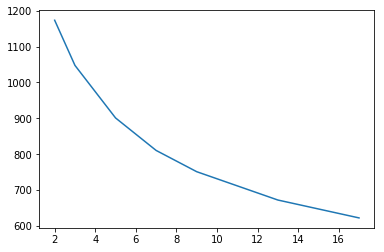

In [136]:
errors=[]
k_value=[2,3,5,7,9, 13,  17]
for i in k_value:
    kmeans = KMeans(n_clusters=i, random_state=0, n_jobs=-1)
    kmeans.fit(sent_vectors_train)
    pred=kmeans.predict(sent_vectors_test)
    errors.append(kmeans.inertia_)
plt.plot(k_value, errors)
plt.show()


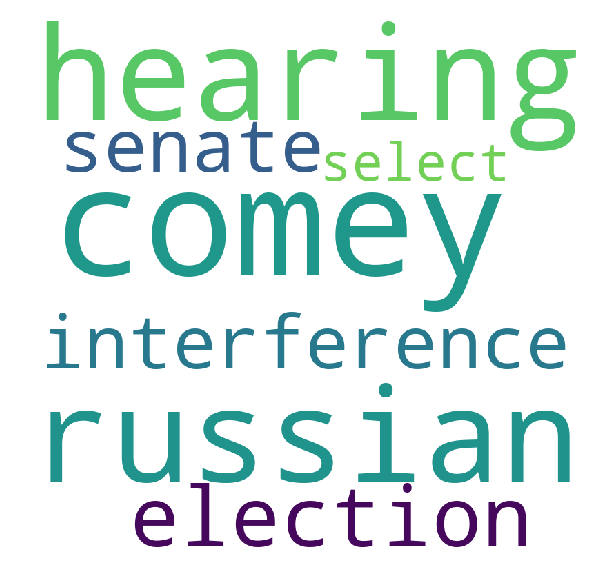

In [145]:
feature_importances = pd.DataFrame(w,index = X_train, columns=['importance']).sort_values('importance',ascending=False)
a=feature_importances.iloc[0:1]
comment_words = ' '
for val in a.index: 
    val = str(val) 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

        stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Weighted TFIDF Word2vec Vectorizations

In [148]:
list_sent=[]
for sent in preprocessed_reviews:
    list_sent.append(sent.split())
X=list_sent[:]
X_train=X[:13000]
X_test=X[13000:]
# y=final['Score'][:]
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)
w2v_model=gensim.models.Word2Vec(X_train,min_count=5, size=50)
w2v_words = list(w2v_model.wv.vocab)
dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(X_train):
    # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_features:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1

dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_sent_vectors_test = []; 

row=0;
for sent in tqdm(X_test): 
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words and word in tfidf_features:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████| 5747/5747 [00:03<00:00, 1591.62it/s]


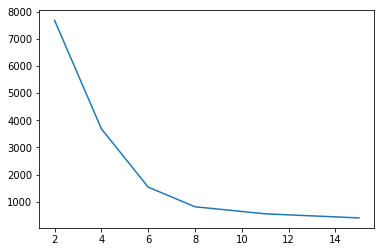

In [176]:
errors=[]
k_value=[2,4,6,8,11, 15]
for i in k_value:
    kmeans = KMeans(n_clusters=i, random_state=0, n_jobs=-1)
    kmeans.fit(tfidf_sent_vectors_train)
    pred=kmeans.predict(tfidf_sent_vectors_test)
    errors.append(kmeans.inertia_)
plt.plot(k_value, errors)
plt.show()

In [183]:
model=KMeans(n_clusters=8, n_jobs=-1)
z=tfidf.fit_transform(preprocessed_reviews)
model.fit(scaler.fit_transform(tfidf_sent_vectors_train))
w=model.labels_

### Density Based Clustering 
#### Using W2v and weighted W2V

In [191]:
from sklearn.cluster import DBSCAN

In [207]:
model = DBSCAN(eps=1)
model.fit(scaler.fit_transform(sent_vectors_train))
w=model.labels_

In [208]:
set(w)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70}

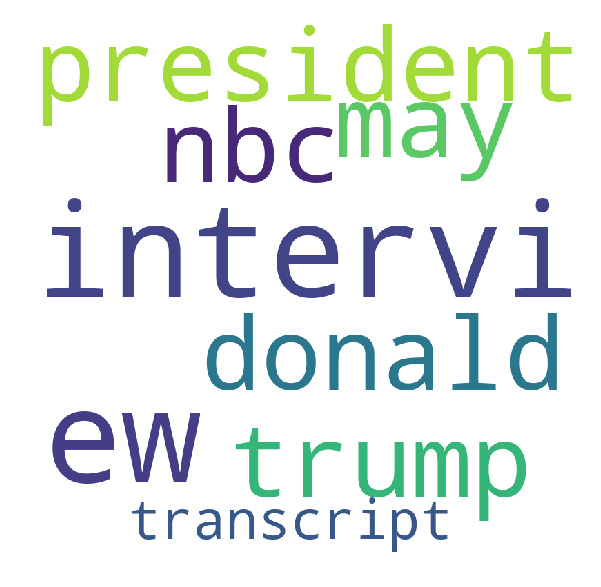

In [209]:
feature_importances = pd.DataFrame(w,index = preprocessed_reviews[:len(w)], columns=['importance']).sort_values('importance',ascending=False)
a=feature_importances.iloc[10:11]
comment_words = ' '
for val in a.index: 
    val = str(val) 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

        stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [210]:
model = DBSCAN(eps=0.5)
model.fit(scaler.fit_transform(tfidf_sent_vectors_train))
w=model.labels_

In [211]:
set(w)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94}

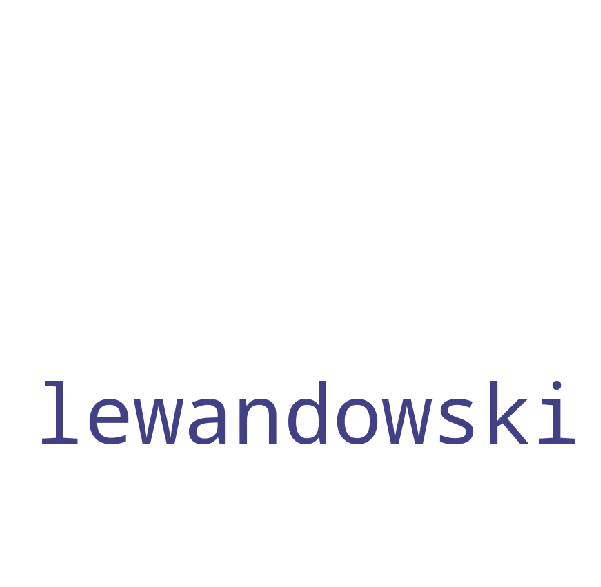

In [212]:
feature_importances = pd.DataFrame(w,index = preprocessed_reviews[:len(w)], columns=['importance']).sort_values('importance',ascending=False)
a=feature_importances.iloc[0:1]
comment_words = ' '
for val in a.index: 
    val = str(val) 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

        stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()